# EDA - Hedge Fund Time Series Prediction

This notebook performs exploratory data analysis on the Hedge Fund prediction dataset.

## Dataset Overview
- **id**: Unique identifier (code__sub_code__sub_category__horizon__ts_index)
- **code**: Unique identifier for the entity
- **sub_code**: Categorical attribute grouping entities
- **sub_category**: Categorical label describing category
- **ts_index**: Integer timestamp of observation
- **horizon**: Forecast-horizon group (1, 3, 10, 25)
- **weight**: Weight for evaluation metric (DO NOT USE AS FEATURE)
- **y_target**: Target variable to predict
- **feature_a to feature_ch**: 86 anonymized features

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

## 2. Load Data

In [2]:
train_path = "../data/ts-forecasting/train.parquet"
test_path = "../data/ts-forecasting/test.parquet"

# Read with Polars for efficiency
df_train_pl = pl.read_parquet(train_path)
df_test_pl = pl.read_parquet(test_path)

# Convert to Pandas for easier EDA
df_train = df_train_pl.to_pandas()
df_test = df_test_pl.to_pandas()

print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")

Train shape: (5337414, 94)
Test shape: (1447107, 92)


## 3. Basic Information

In [3]:
print("=" * 60)
print("TRAIN DATASET INFO")
print("=" * 60)
print(f"\nTotal rows: {len(df_train):,}")
print(f"Total columns: {len(df_train.columns)}")
print(f"\nColumn names:")
for i, col in enumerate(df_train.columns, 1):
    print(f"  {i:2d}. {col}")

TRAIN DATASET INFO

Total rows: 5,337,414
Total columns: 94

Column names:
   1. id
   2. code
   3. sub_code
   4. sub_category
   5. horizon
   6. ts_index
   7. feature_a
   8. feature_b
   9. feature_c
  10. feature_d
  11. feature_e
  12. feature_f
  13. feature_g
  14. feature_h
  15. feature_i
  16. feature_j
  17. feature_k
  18. feature_l
  19. feature_m
  20. feature_n
  21. feature_o
  22. feature_p
  23. feature_q
  24. feature_r
  25. feature_s
  26. feature_t
  27. feature_u
  28. feature_v
  29. feature_w
  30. feature_x
  31. feature_y
  32. feature_z
  33. feature_aa
  34. feature_ab
  35. feature_ac
  36. feature_ad
  37. feature_ae
  38. feature_af
  39. feature_ag
  40. feature_ah
  41. feature_ai
  42. feature_aj
  43. feature_ak
  44. feature_al
  45. feature_am
  46. feature_an
  47. feature_ao
  48. feature_ap
  49. feature_aq
  50. feature_ar
  51. feature_as
  52. feature_at
  53. feature_au
  54. feature_av
  55. feature_aw
  56. feature_ax
  57. feature_ay
 

In [4]:
# Identify feature columns
exclude_cols = ['id', 'weight', 'y_target']
all_cols = df_train.columns.tolist()
feature_cols = [col for col in all_cols if col not in exclude_cols]

# Identify categorical columns
cat_col_names = []
for col in ['code', 'sub_code', 'sub_category', 'horizon']:
    if col in feature_cols:
        cat_col_names.append(col)

# Identify numerical columns
num_col_names = [col for col in feature_cols if col not in cat_col_names]

print(f"Total columns: {len(all_cols)}")
print(f"Excluded columns: {exclude_cols}")
print(f"\nFeature columns: {len(feature_cols)}")
print(f"  - Categorical: {len(cat_col_names)} ({cat_col_names})")
print(f"  - Numerical: {len(num_col_names)}")

Total columns: 94
Excluded columns: ['id', 'weight', 'y_target']

Feature columns: 91
  - Categorical: 4 (['code', 'sub_code', 'sub_category', 'horizon'])
  - Numerical: 87


In [5]:
# Display first few rows
df_train.head(10)

,id,code,sub_code,sub_category,horizon,ts_index,feature_a,feature_b,feature_c,feature_d,...,feature_ca,feature_cb,feature_cc,feature_cd,feature_ce,feature_cf,feature_cg,feature_ch,y_target,weight
0,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__25__89,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,25,89,29,16.364093,7.464023,5.966933,...,-0.001686,-0.105328,-0.005045,NaN,-0.133697,2.849819,0.112068,1,-0.551324,40.982572
1,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__1__89,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,1,89,53,2.858806,5.050617,15.906651,...,-0.001686,-0.105328,-0.005045,NaN,-0.133697,2.849819,0.112068,1,-0.315583,150.075406
2,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__3__89,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,3,89,51,9.585452,1.076268,9.004147,...,-0.001686,-0.105328,-0.005045,NaN,-0.133697,2.849819,0.112068,1,-0.362894,115.953552
3,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__10__89,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,10,89,44,8.840588,15.034634,4.170780,...,-0.001686,-0.105328,-0.005045,NaN,-0.133697,2.849819,0.112068,1,-0.667023,64.573073
4,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__25__90,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,25,90,28,2.303825,7.696209,12.896100,...,-0.001622,-0.103809,-0.005135,NaN,-0.174660,2.738606,0.109204,1,-0.437398,41.948761
5,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__10__90,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,10,90,43,7.670046,13.530307,6.742442,...,-0.001622,-0.103809,-0.005135,NaN,-0.174660,2.738606,0.109204,1,-0.242618,65.264707
6,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__3__90,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,3,90,50,15.530394,0.345051,5.408604,...,-0.001622,-0.103809,-0.005135,NaN,-0.174660,2.738606,0.109204,1,-0.112007,117.088812
7,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__1__90,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,1,90,52,3.087222,1.252656,2.631384,...,-0.001622,-0.103809,-0.005135,NaN,-0.174660,2.738606,0.109204,1,0.023809,154.974339
8,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__10__91,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,10,91,42,5.503506,16.311692,7.548230,...,-0.001714,-0.104448,-0.005063,NaN,-0.048834,2.807526,0.107697,1,-0.369128,66.326961
9,W2MW3G2L__J0G2B0KU__PZ9S1Z4V__25__91,W2MW3G2L,J0G2B0KU,PZ9S1Z4V,25,91,27,13.164843,4.948078,1.252419,...,-0.001714,-0.104448,-0.005063,NaN,-0.048834,2.807526,0.107697,1,-1.037938,42.322662


In [6]:
# Data types
print("Data Types:")
print(df_train.dtypes.value_counts())
print("\n" + "=" * 60)
print("Detailed Data Types:")
for col in df_train.columns:
    print(f"{col:30s} : {str(df_train[col].dtype):15s} | Nulls: {df_train[col].isnull().sum():,}")

Data Types:
float64    86
object      4
int32       3
int64       1
Name: count, dtype: int64

Detailed Data Types:
id                             : object          | Nulls: 0
code                           : object          | Nulls: 0
sub_code                       : object          | Nulls: 0
sub_category                   : object          | Nulls: 0
horizon                        : int32           | Nulls: 0
ts_index                       : int32           | Nulls: 0
feature_a                      : int32           | Nulls: 0
feature_b                      : float64         | Nulls: 0
feature_c                      : float64         | Nulls: 0
feature_d                      : float64         | Nulls: 0
feature_e                      : float64         | Nulls: 0
feature_f                      : float64         | Nulls: 0
feature_g                      : float64         | Nulls: 0
feature_h                      : float64         | Nulls: 58,465
feature_i                      : float6

## 4. Missing Values Analysis

In [8]:
missing_train = df_train[feature_cols].isnull().sum()
missing_test = df_test[feature_cols].isnull().sum()

missing_df = pd.DataFrame({
    'Feature': feature_cols,
    'Train_Missing': missing_train.values,
    'Train_Missing_Pct': (missing_train.values / len(df_train) * 100),
    'Test_Missing': missing_test.values,
    'Test_Missing_Pct': (missing_test.values / len(df_test) * 100)
})

missing_df = missing_df.sort_values('Train_Missing_Pct', ascending=False)

print("Features with Missing Values:")
print("=" * 80)
print(missing_df[missing_df['Train_Missing'] > 0].to_string(index=False))

print(f"\n\nTotal features with missing values: {(missing_df['Train_Missing'] > 0).sum()}")
print(f"Total features without missing values: {(missing_df['Train_Missing'] == 0).sum()}")

Features with Missing Values:
   Feature  Train_Missing  Train_Missing_Pct  Test_Missing  Test_Missing_Pct
feature_at         665676          12.471882        133629          9.234217
feature_by         588140          11.019194        133196          9.204295
feature_ay         455920           8.541964         83915          5.798811
feature_cd         400114           7.496402         83887          5.796876
feature_ce         275829           5.167840         51018          3.525517
feature_cf         236389           4.428905         51018          3.525517
feature_al         225416           4.223319         47163          3.259123
feature_aw         205194           3.844446         55028          3.802621
feature_bz         151722           2.842613         54635          3.775464
feature_bi         147432           2.762237         48515          3.352551
 feature_i          59025           1.105873           180          0.012439
 feature_k          59025           1.105873  

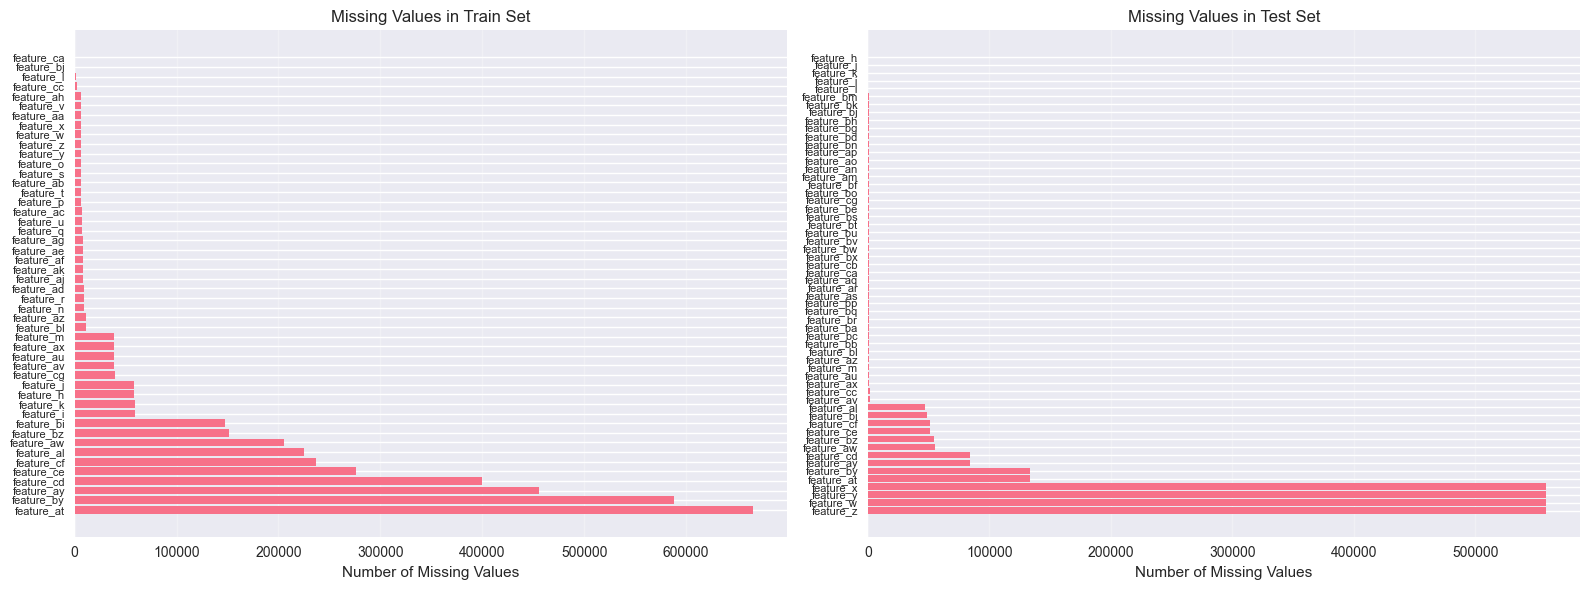

In [9]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Train missing
missing_train_sorted = missing_train[missing_train > 0].sort_values(ascending=False)
if len(missing_train_sorted) > 0:
    axes[0].barh(range(len(missing_train_sorted)), missing_train_sorted.values)
    axes[0].set_yticks(range(len(missing_train_sorted)))
    axes[0].set_yticklabels(missing_train_sorted.index, fontsize=8)
    axes[0].set_xlabel('Number of Missing Values')
    axes[0].set_title('Missing Values in Train Set')
    axes[0].grid(axis='x', alpha=0.3)
else:
    axes[0].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14)
    axes[0].set_title('Missing Values in Train Set')

# Test missing
missing_test_sorted = missing_test[missing_test > 0].sort_values(ascending=False)
if len(missing_test_sorted) > 0:
    axes[1].barh(range(len(missing_test_sorted)), missing_test_sorted.values)
    axes[1].set_yticks(range(len(missing_test_sorted)))
    axes[1].set_yticklabels(missing_test_sorted.index, fontsize=8)
    axes[1].set_xlabel('Number of Missing Values')
    axes[1].set_title('Missing Values in Test Set')
    axes[1].grid(axis='x', alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14)
    axes[1].set_title('Missing Values in Test Set')

plt.tight_layout()
plt.show()

## 5. Target Variable Analysis

In [10]:
print("Target Variable (y_target) Statistics:")
print("=" * 60)
print(df_train['y_target'].describe())
print(f"\nSkewness: {df_train['y_target'].skew():.4f}")
print(f"Kurtosis: {df_train['y_target'].kurtosis():.4f}")

Target Variable (y_target) Statistics:
count    5.337414e+06
mean    -6.659048e-01
std      3.252764e+01
min     -2.201882e+03
25%     -1.290776e-01
50%     -5.774818e-04
75%      5.106807e-02
max      2.314411e+03
Name: y_target, dtype: float64

Skewness: 1.1886
Kurtosis: 289.7651


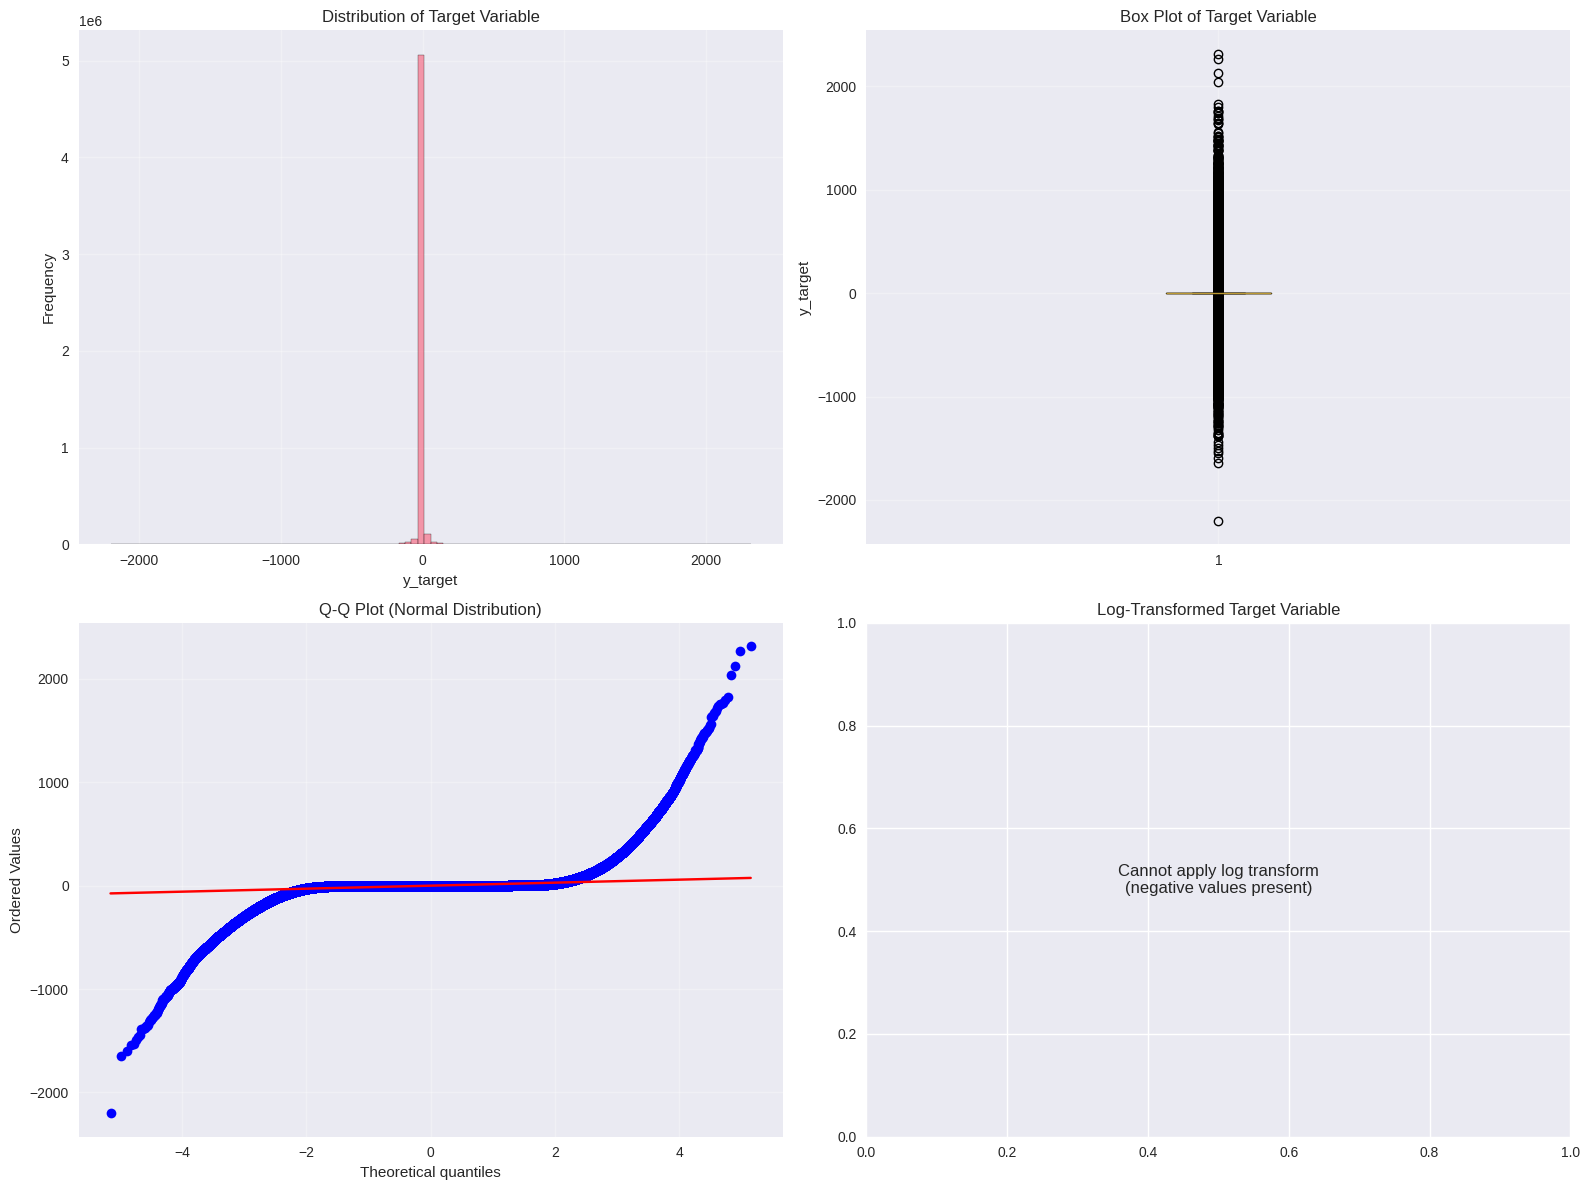

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(df_train['y_target'], bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('y_target')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Target Variable')
axes[0, 0].grid(alpha=0.3)

# Box plot
axes[0, 1].boxplot(df_train['y_target'], vert=True)
axes[0, 1].set_ylabel('y_target')
axes[0, 1].set_title('Box Plot of Target Variable')
axes[0, 1].grid(alpha=0.3)

# Q-Q plot (approximate)
from scipy import stats
stats.probplot(df_train['y_target'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Distribution)')
axes[1, 0].grid(alpha=0.3)

# Log transformation (if needed)
if (df_train['y_target'] > 0).all():
    axes[1, 1].hist(np.log1p(df_train['y_target']), bins=100, edgecolor='black', alpha=0.7)
    axes[1, 1].set_xlabel('log(1 + y_target)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Log-Transformed Target Variable')
    axes[1, 1].grid(alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'Cannot apply log transform\n(negative values present)', 
                   ha='center', va='center', fontsize=12)
    axes[1, 1].set_title('Log-Transformed Target Variable')

plt.tight_layout()
plt.show()

## 6. Categorical Features Analysis

In [11]:
for col in cat_col_names:
    print(f"\n{'=' * 60}")
    print(f"{col.upper()}")
    print(f"{'=' * 60}")
    print(f"Unique values: {df_train[col].nunique()}")
    print(f"\nValue counts:")
    value_counts = df_train[col].value_counts()
    print(value_counts.head(20))
    if len(value_counts) > 20:
        print(f"... and {len(value_counts) - 20} more values")


CODE
Unique values: 23

Value counts:
code
OSJL3A7Y    564790
6LB028J8    484082
K7Y1TTAH    324479
VFWIFJPS    318517
W2MW3G2L    305116
1HEMHZK2    293024
660DZME0    264071
4KUR2ZOZ    263685
SJZP0OVU    237283
84J8BJFZ    234375
MRV5UON2    223256
K8I5QG74    222146
EP12UF2K    213164
X9BZ68VQ    209261
W4S29LF4    193977
MLAAMU3K    184735
2RBMUWP1    176409
10BAVIDU    134886
QAQDDTPJ    130876
83EG83KQ    118694
Name: count, dtype: int64
... and 3 more values

SUB_CODE
Unique values: 180

Value counts:
sub_code
69SD4Y3A    69521
OYJGNSQK    69390
TI04KMOC    68844
XT8JWYHT    68515
PCXKOBIH    68383
J7UUOGYG    66946
9G2OWCRE    65507
DYJUJX3J    64163
CUXV51HW    60184
FECMBC0A    59645
SK266WXC    57477
KL66VIS3    56776
NSYBU89B    56342
H9GNMAHM    56145
WN2GFZ9X    55886
916L3K5Q    55126
FDIGHKLX    54258
SE7KARJH    53089
Q8656BRJ    52644
VSDA521V    52411
Name: count, dtype: int64
... and 160 more values

SUB_CATEGORY
Unique values: 5

Value counts:
sub_category
PZ9S1Z

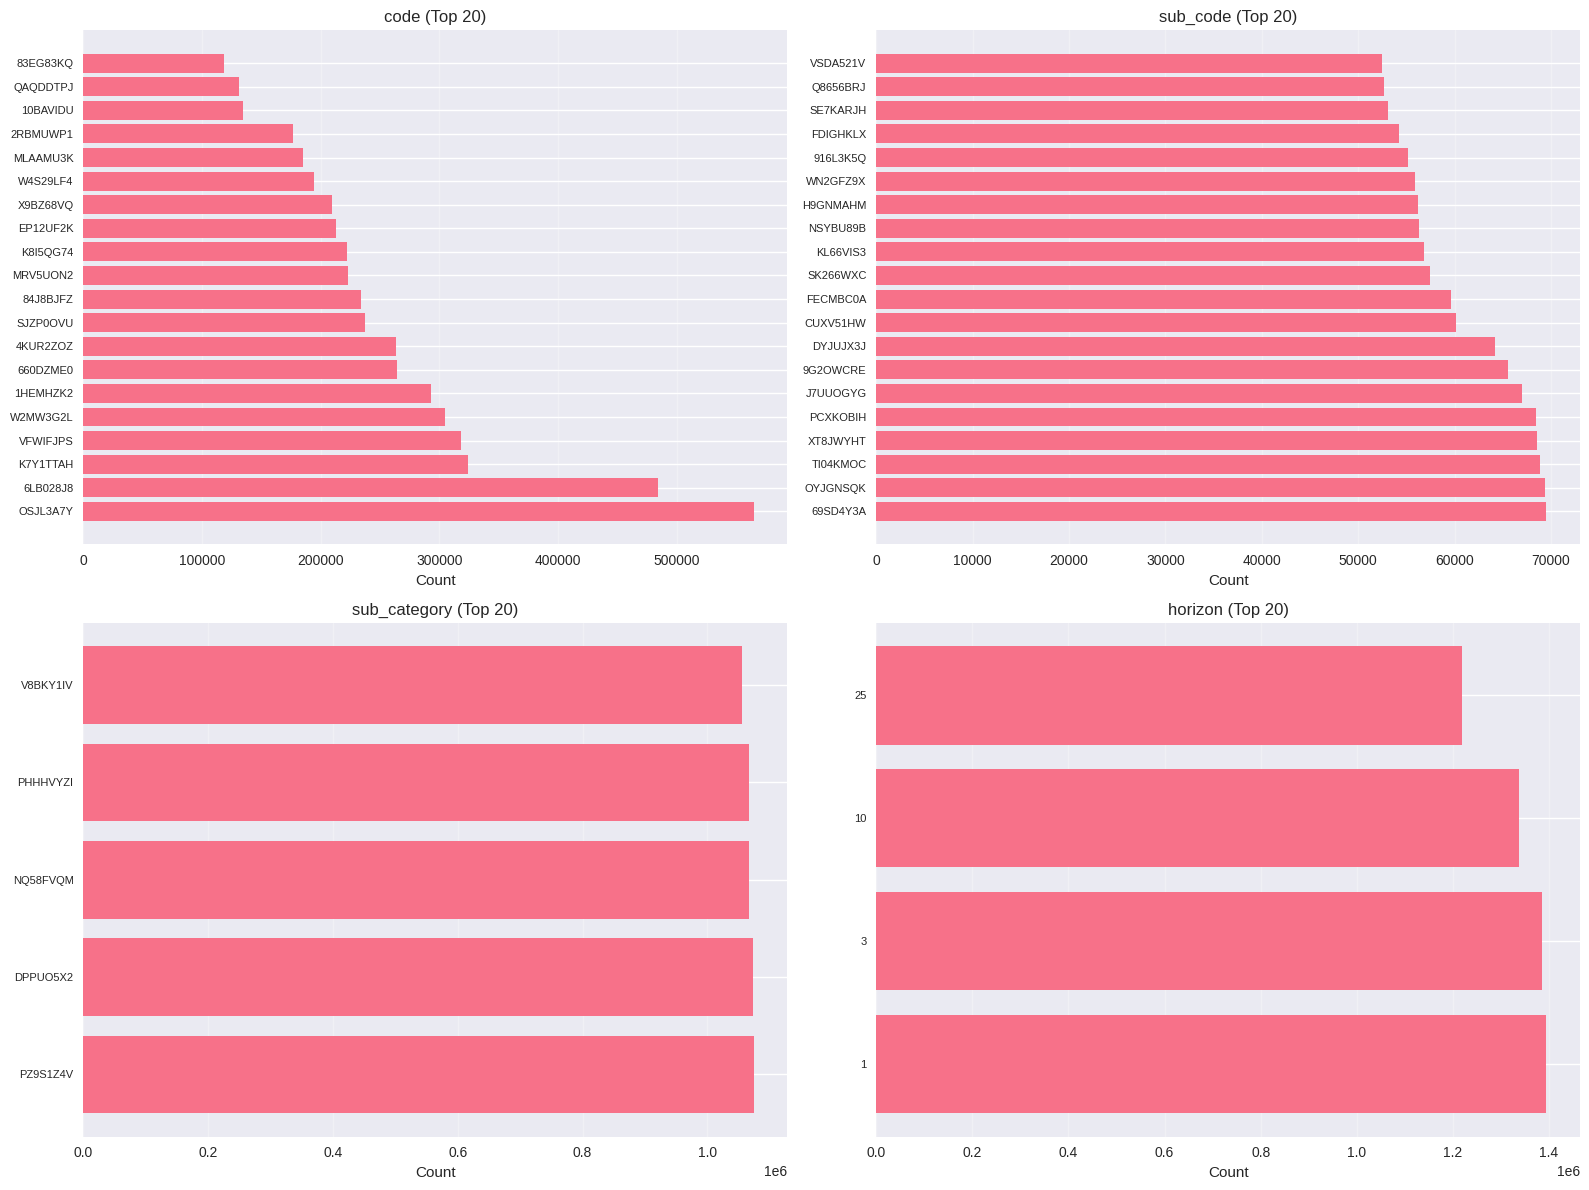

In [12]:
# Visualize categorical features
n_cats = len(cat_col_names)
if n_cats > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for idx, col in enumerate(cat_col_names[:4]):
        value_counts = df_train[col].value_counts().head(20)
        axes[idx].barh(range(len(value_counts)), value_counts.values)
        axes[idx].set_yticks(range(len(value_counts)))
        axes[idx].set_yticklabels(value_counts.index, fontsize=8)
        axes[idx].set_xlabel('Count')
        axes[idx].set_title(f'{col} (Top 20)')
        axes[idx].grid(axis='x', alpha=0.3)
    
    # Hide unused subplots
    for idx in range(len(cat_col_names), 4):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

## 7. Time-Series Analysis (ts_index)

Time Index (ts_index) Analysis:
Min ts_index: 1
Max ts_index: 3601
Unique values: 3601

Value counts (first 20):
ts_index
1     685
2     696
3     688
4     582
5     620
6     671
7     673
8     635
9     663
10    649
11    648
12    688
13    692
14    753
15    643
16    682
17    785
18    833
19    871
20    847
Name: count, dtype: int64


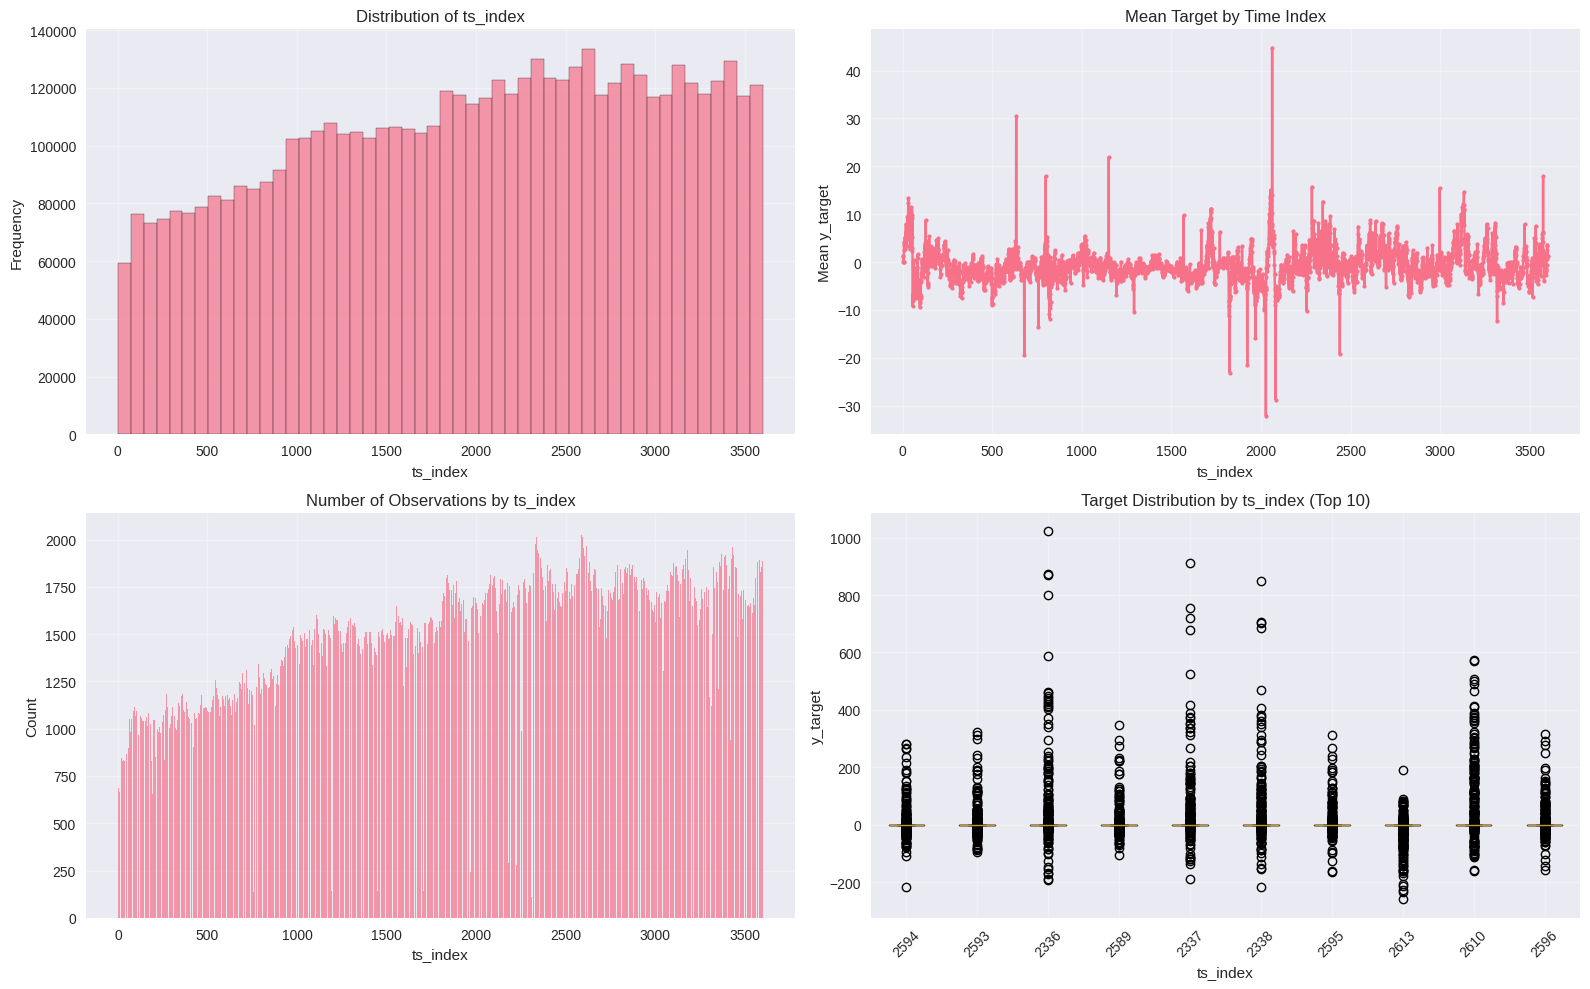

In [13]:
if 'ts_index' in feature_cols:
    print("Time Index (ts_index) Analysis:")
    print("=" * 60)
    print(f"Min ts_index: {df_train['ts_index'].min()}")
    print(f"Max ts_index: {df_train['ts_index'].max()}")
    print(f"Unique values: {df_train['ts_index'].nunique()}")
    print(f"\nValue counts (first 20):")
    print(df_train['ts_index'].value_counts().sort_index().head(20))
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Distribution
    axes[0, 0].hist(df_train['ts_index'], bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('ts_index')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Distribution of ts_index')
    axes[0, 0].grid(alpha=0.3)
    
    # Time series of target
    ts_target = df_train.groupby('ts_index')['y_target'].mean().sort_index()
    axes[0, 1].plot(ts_target.index, ts_target.values, marker='o', markersize=3)
    axes[0, 1].set_xlabel('ts_index')
    axes[0, 1].set_ylabel('Mean y_target')
    axes[0, 1].set_title('Mean Target by Time Index')
    axes[0, 1].grid(alpha=0.3)
    
    # Count by ts_index
    ts_count = df_train['ts_index'].value_counts().sort_index()
    axes[1, 0].bar(ts_count.index, ts_count.values, alpha=0.7)
    axes[1, 0].set_xlabel('ts_index')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('Number of Observations by ts_index')
    axes[1, 0].grid(alpha=0.3)
    
    # Target distribution by ts_index (sample)
    sample_ts = df_train['ts_index'].value_counts().head(10).index
    data_to_plot = [df_train[df_train['ts_index'] == ts]['y_target'].values for ts in sample_ts]
    axes[1, 1].boxplot(data_to_plot, labels=sample_ts)
    axes[1, 1].set_xlabel('ts_index')
    axes[1, 1].set_ylabel('y_target')
    axes[1, 1].set_title('Target Distribution by ts_index (Top 10)')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 8. Numerical Features Analysis

In [14]:
# Statistical summary of numerical features
print("Numerical Features Summary:")
print("=" * 80)
print(df_train[num_col_names].describe().T)

Numerical Features Summary:
                count         mean         std         min          25%  \
ts_index    5337414.0  1963.320255  997.022012    1.000000  1148.000000   
feature_a   5337414.0    88.681548   56.031413    0.000000    40.000000   
feature_b   5337414.0     8.567391    4.869982    0.130004     4.350043   
feature_c   5337414.0     8.564846    4.869406    0.130002     4.350582   
feature_d   5337414.0     8.565059    4.871465    0.130001     4.346282   
...               ...          ...         ...         ...          ...   
feature_cd  4937300.0    -0.823940    3.243581 -247.590139    -0.102282   
feature_ce  5061585.0    -0.022882    0.172899   -7.684573    -0.043208   
feature_cf  5101025.0     1.472680    1.491990    0.006128     0.117361   
feature_cg  5297770.0     1.062790    1.303983    0.016065     0.080293   
feature_ch  5337414.0     2.323426    2.092968    0.000000     1.000000   

                    50%          75%          max  
ts_index    2036.00

In [15]:
# Check for constant features
constant_features = []
for col in num_col_names:
    if df_train[col].nunique() <= 1:
        constant_features.append(col)

if constant_features:
    print(f"Constant features (same value for all rows): {constant_features}")
else:
    print("No constant features found.")

No constant features found.


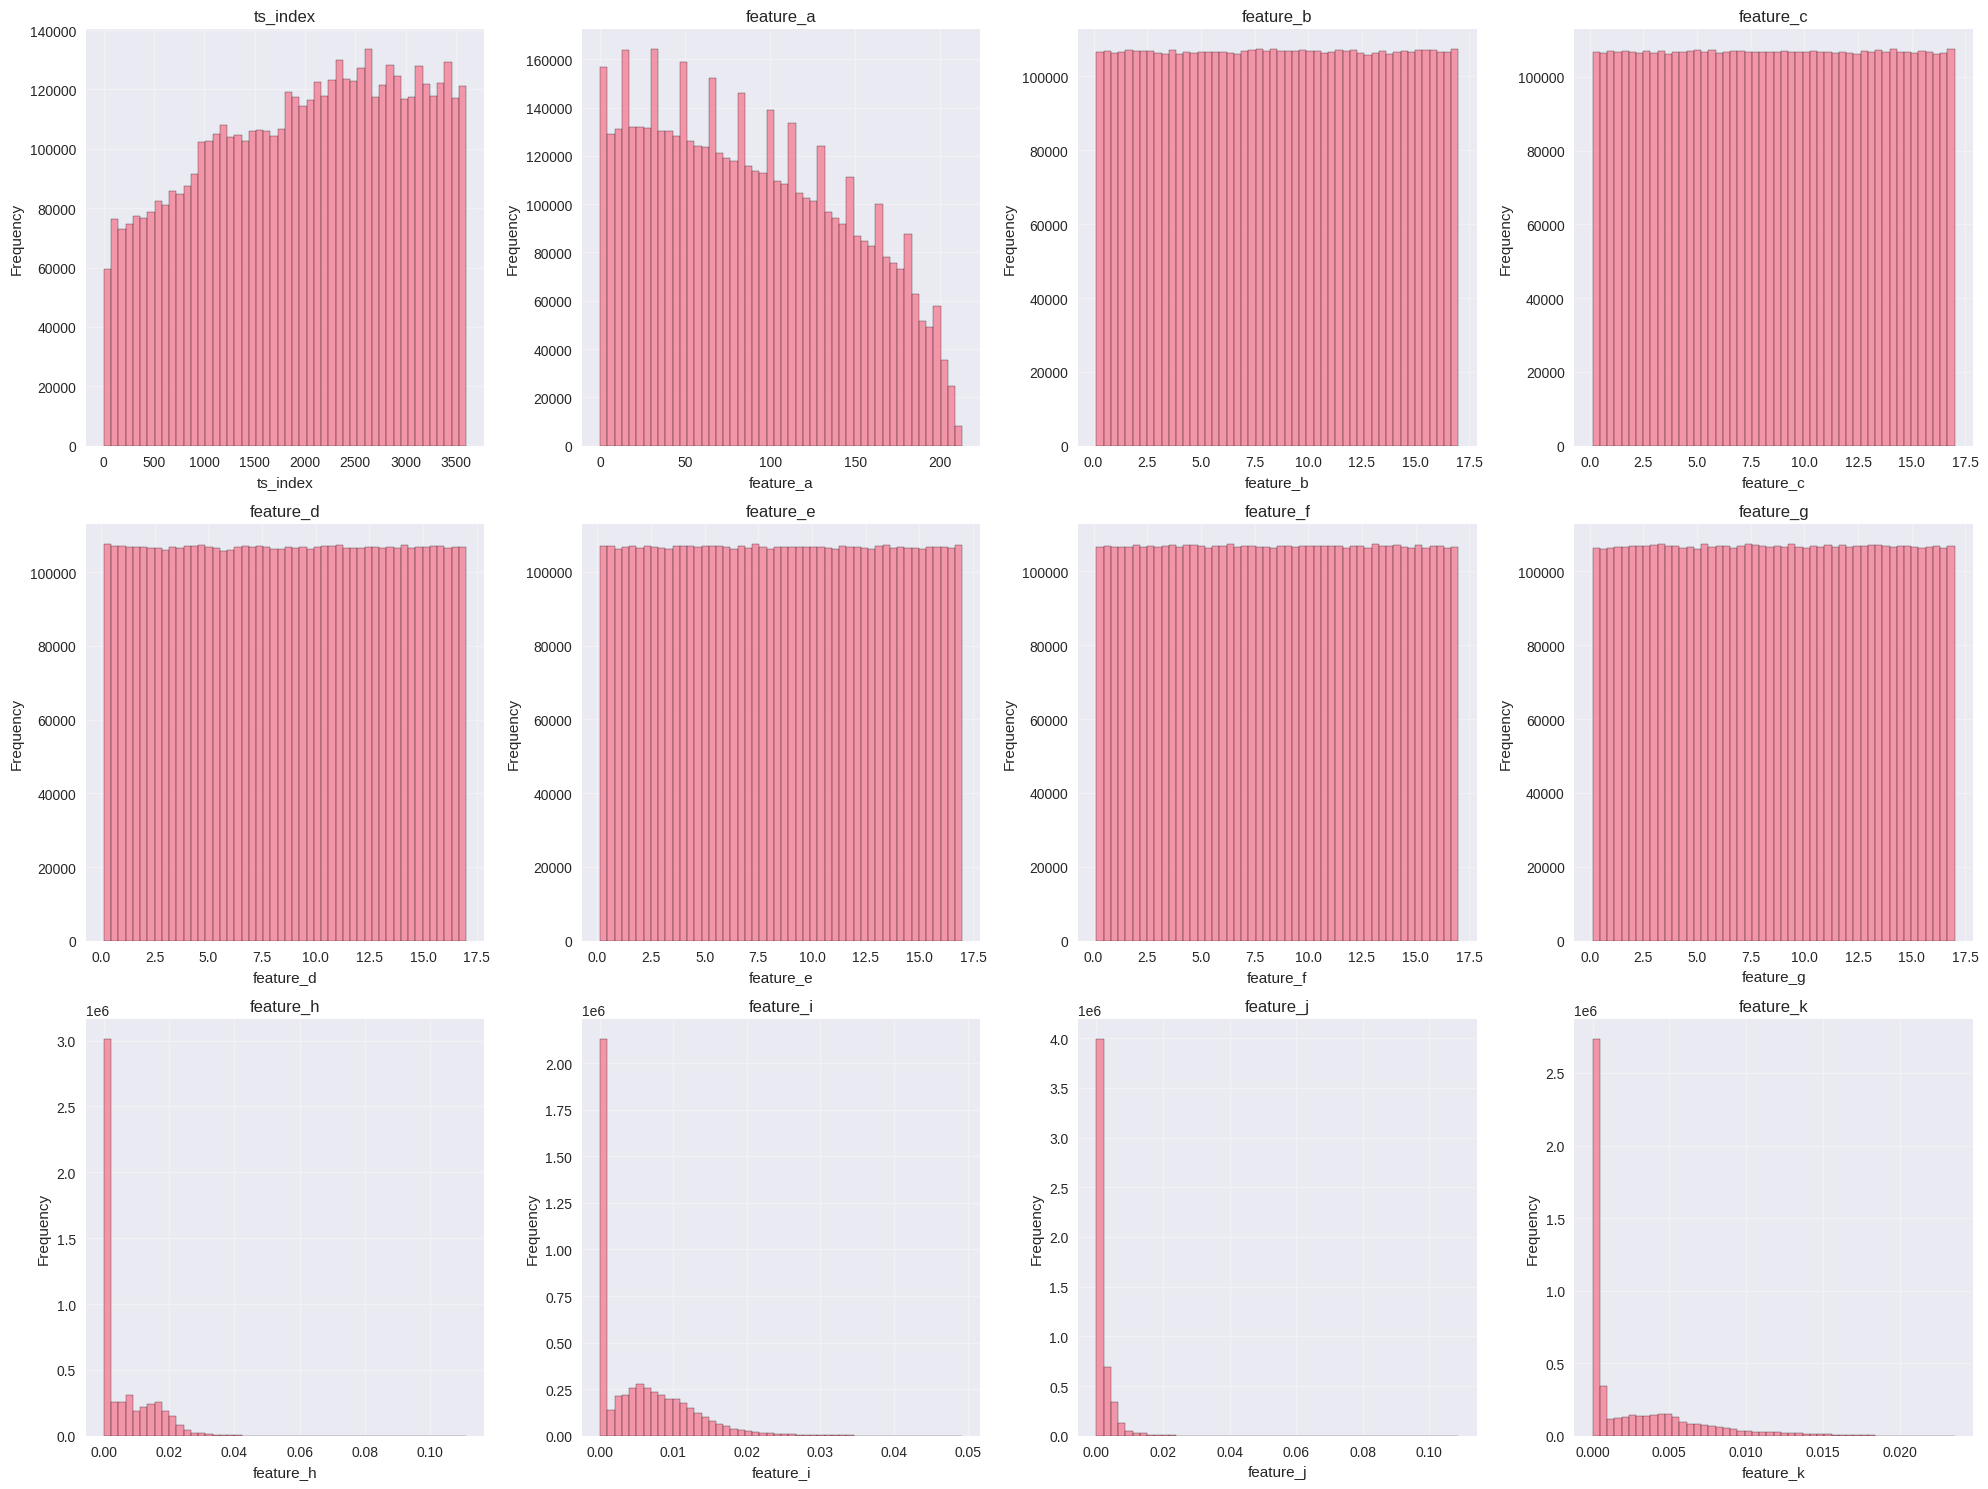

In [16]:
# Distribution of first 12 numerical features
n_features_to_plot = min(12, len(num_col_names))
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for idx, col in enumerate(num_col_names[:n_features_to_plot]):
    axes[idx].hist(df_train[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{col}')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Correlation Analysis

In [17]:
# Correlation with target
corr_with_target = df_train[num_col_names + ['y_target']].corr()['y_target'].sort_values(ascending=False)
corr_with_target = corr_with_target.drop('y_target')

print("Top 20 Features Correlated with Target:")
print("=" * 60)
print(corr_with_target.head(20))
print("\n\nBottom 20 Features Correlated with Target:")
print("=" * 60)
print(corr_with_target.tail(20))

Top 20 Features Correlated with Target:
feature_bz    0.090461
feature_cd    0.085975
feature_by    0.025680
feature_bg    0.021508
feature_cc    0.017016
feature_cf    0.016188
feature_m     0.014570
ts_index      0.014441
feature_bv    0.013384
feature_a     0.012855
feature_ch    0.012707
feature_cb    0.011295
feature_ai    0.011182
feature_bp    0.010611
feature_ar    0.009567
feature_ad    0.008947
feature_aj    0.008381
feature_j     0.008325
feature_at    0.007998
feature_ab    0.007171
Name: y_target, dtype: float64


Bottom 20 Features Correlated with Target:
feature_ah   -0.014461
feature_n    -0.016073
feature_bn   -0.016427
feature_ae   -0.016557
feature_aq   -0.017065
feature_p    -0.017898
feature_bw   -0.019895
feature_h    -0.025394
feature_l    -0.027329
feature_v    -0.029046
feature_k    -0.029943
feature_t    -0.032575
feature_am   -0.034625
feature_o    -0.036360
feature_ag   -0.044977
feature_s    -0.046017
feature_bm   -0.054569
feature_bo   -0.058157
feature_u 

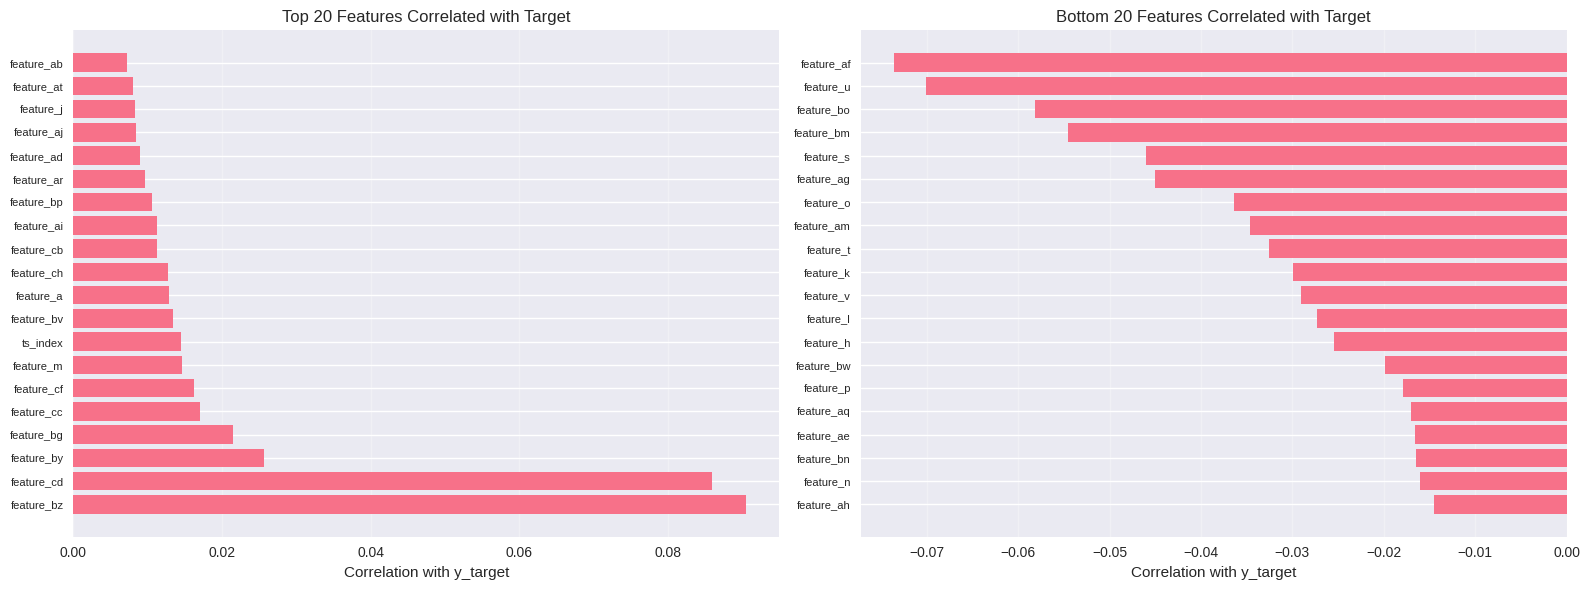

In [18]:
# Visualize correlation with target
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top correlations
top_corr = corr_with_target.head(20)
axes[0].barh(range(len(top_corr)), top_corr.values)
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels(top_corr.index, fontsize=8)
axes[0].set_xlabel('Correlation with y_target')
axes[0].set_title('Top 20 Features Correlated with Target')
axes[0].grid(axis='x', alpha=0.3)

# Bottom correlations
bottom_corr = corr_with_target.tail(20)
axes[1].barh(range(len(bottom_corr)), bottom_corr.values)
axes[1].set_yticks(range(len(bottom_corr)))
axes[1].set_yticklabels(bottom_corr.index, fontsize=8)
axes[1].set_xlabel('Correlation with y_target')
axes[1].set_title('Bottom 20 Features Correlated with Target')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

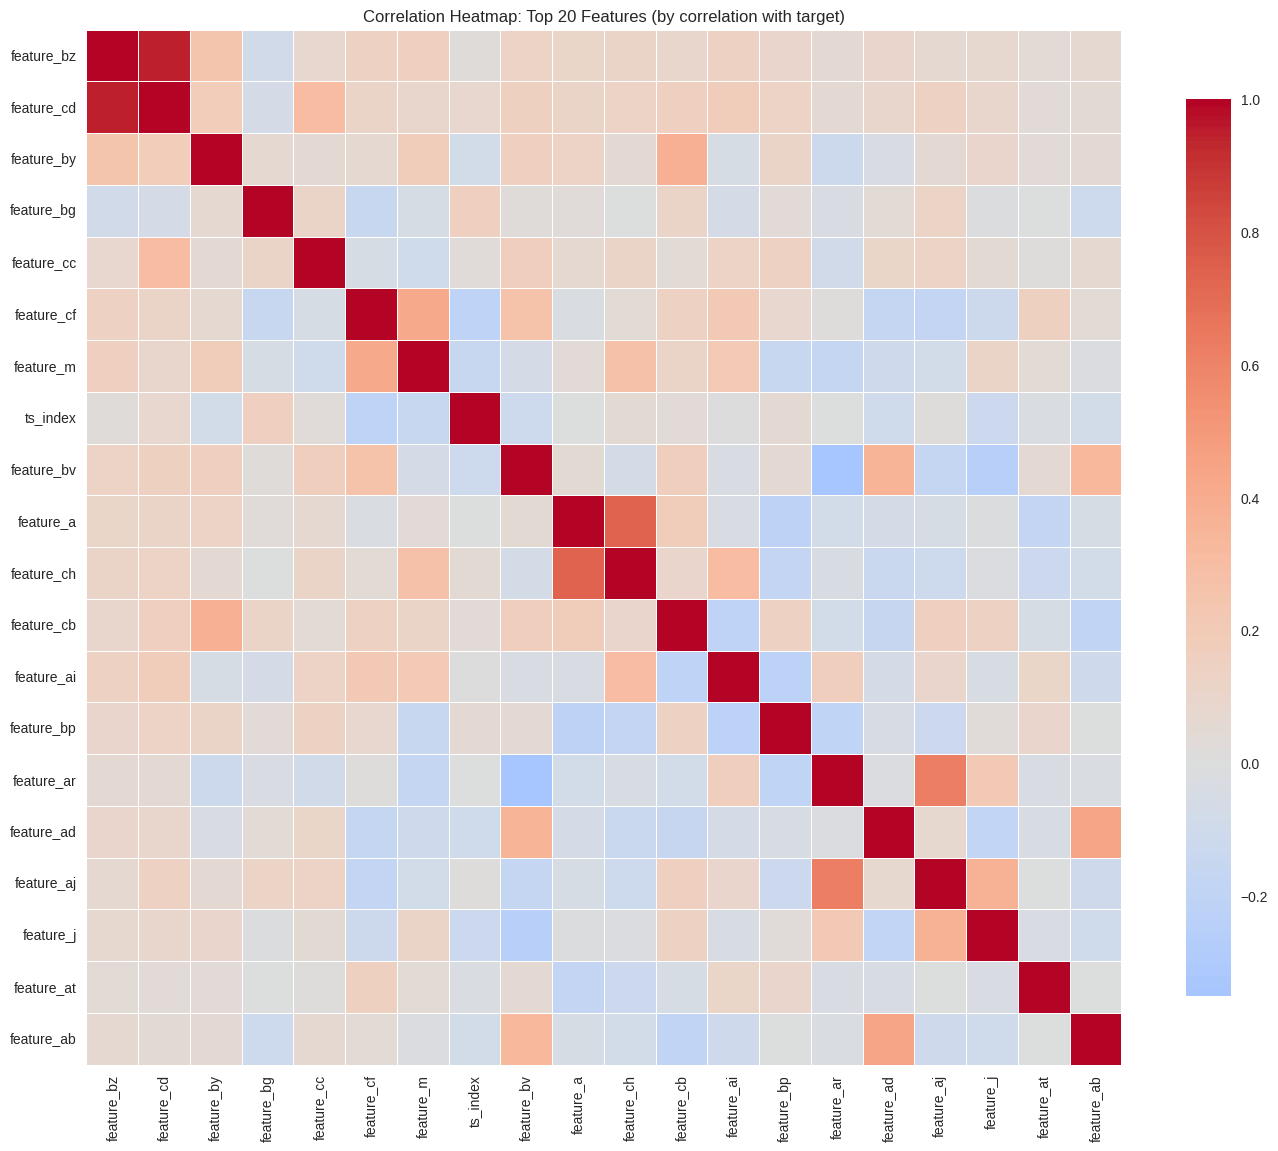

In [19]:
# Feature-to-feature correlation heatmap (sample of top correlated features)
top_features = corr_with_target.abs().head(20).index.tolist()
corr_matrix = df_train[top_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Top 20 Features (by correlation with target)')
plt.tight_layout()
plt.show()

## 10. Summary Statistics

In [20]:
print("=" * 80)
print("EDA SUMMARY")
print("=" * 80)
print(f"\nDataset Shape:")
print(f"  Train: {df_train.shape}")
print(f"  Test: {df_test.shape}")
print(f"\nFeature Breakdown:")
print(f"  Total features: {len(feature_cols)}")
print(f"  Categorical: {len(cat_col_names)}")
print(f"  Numerical: {len(num_col_names)}")
print(f"\nMissing Values:")
missing_count = df_train[feature_cols].isnull().sum().sum()
print(f"  Total missing values in train: {missing_count:,}")
print(f"  Features with missing values: {(df_train[feature_cols].isnull().sum() > 0).sum()}")
print(f"\nTarget Statistics:")
print(f"  Mean: {df_train['y_target'].mean():.4f}")
print(f"  Std: {df_train['y_target'].std():.4f}")
print(f"  Min: {df_train['y_target'].min():.4f}")
print(f"  Max: {df_train['y_target'].max():.4f}")
print(f"  Skewness: {df_train['y_target'].skew():.4f}")
if 'constant_features' in locals() and len(constant_features) > 0:
    print(f"\n⚠️  Constant features found: {constant_features}")
print("\n" + "=" * 80)

EDA SUMMARY

Dataset Shape:
  Train: (5337414, 94)
  Test: (1447107, 92)

Feature Breakdown:
  Total features: 91
  Categorical: 4
  Numerical: 87

Missing Values:
  Total missing values in train: 3,969,979
  Features with missing values: 48

Target Statistics:
  Mean: -0.6659
  Std: 32.5276
  Min: -2201.8816
  Max: 2314.4112
  Skewness: 1.1886

